In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from Functions import Correlations, Distributions

In [2]:
df = pd.read_csv('train_clean.csv')
df.head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_cod
0,0,15674932,Okwudilichukwu,668,France,1,33.0,3,0.0,2,1.0,0.0,181449.97,0,0
1,1,15749177,Okwudiliolisa,627,France,1,33.0,1,0.0,2,1.0,1.0,49503.50,0,0
2,2,15694510,Hsueh,678,France,1,40.0,10,0.0,2,1.0,0.0,184866.69,0,0


## EDA

### Analisis de correlaciones

#### Pearson

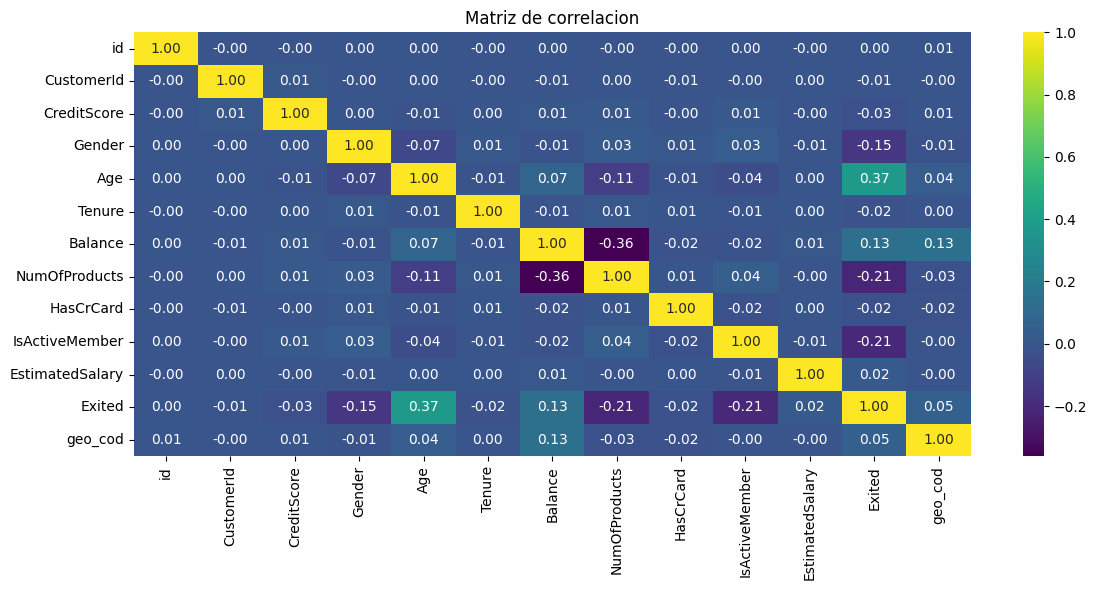

In [3]:
#GRAFICO DE MATRIZ DE CORRELACION PEARSON
matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Matriz de correlacion')
plt.tight_layout()
plt.show()


#### Coeficiente de punto biserial (Variable target vs Variables cuantitativas)

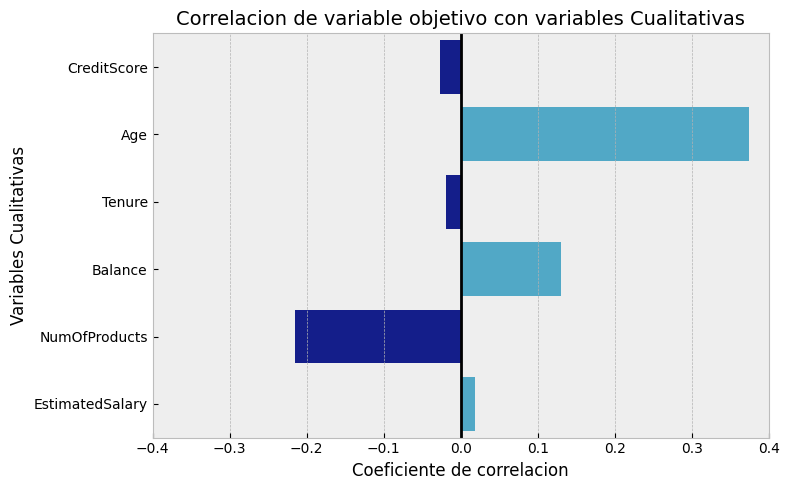

In [4]:
#GRAFICO DE CORRELACION DE PUNTO BISERIAL
numeric_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
Correlations(df, 'Exited', numeric_vars, 'Cualitativas').plot_biserial_point()

#### Coeficiente de contingencia (Variable Target vs Variables Cualitativas)

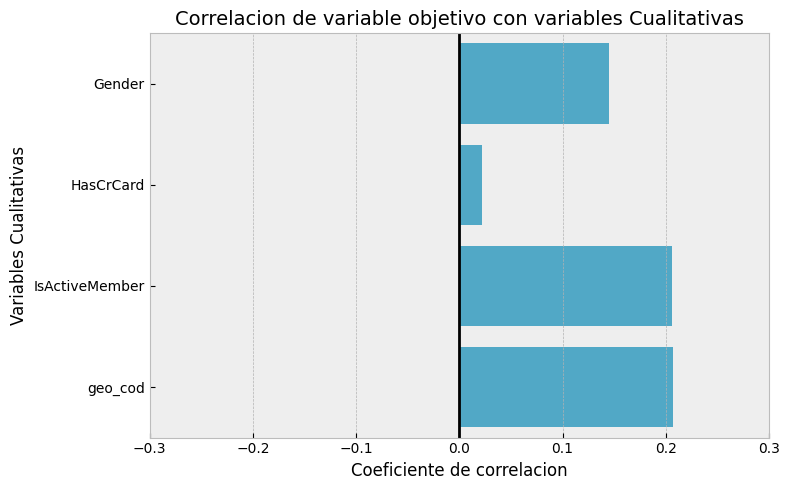

In [6]:
#GRAFICO COEFICIENTE DE CONTINGENCIA
cualit_vars = ['Gender','HasCrCard','IsActiveMember','geo_cod']
Correlations(df, 'Exited', cualit_vars, 'Cualitativas').plot_coef_contingency()

### Graficos

#### Analisis Univariado

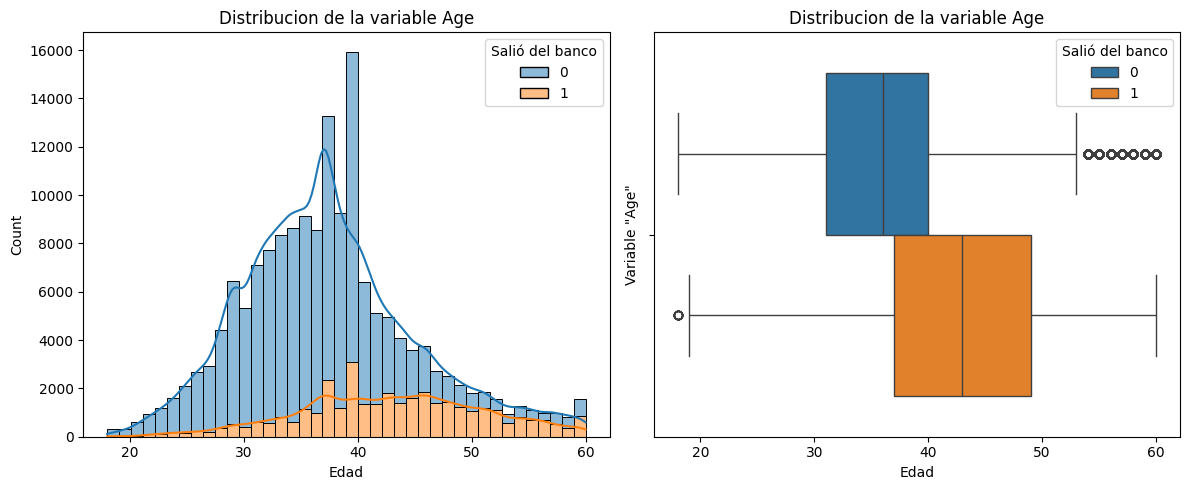

In [ ]:
#DISTRIBUCION DE LA VARIABLE AGE
Distributions(df.Age, df.Exited, 'Age', 'Edad').plot_distribution(40)

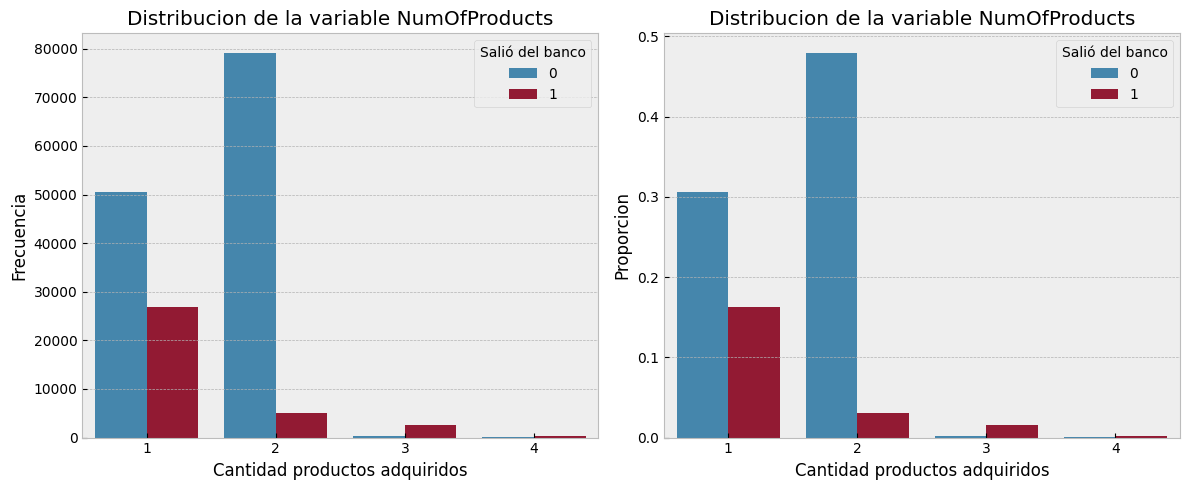

In [ ]:
#DISTRIBUCION VARIABLE NUMOFPRODUCTS
Distributions(df.NumOfProducts, df.Exited, 'NumOfProducts', 'Cantidad productos adquiridos').plot_distribution_cualit()

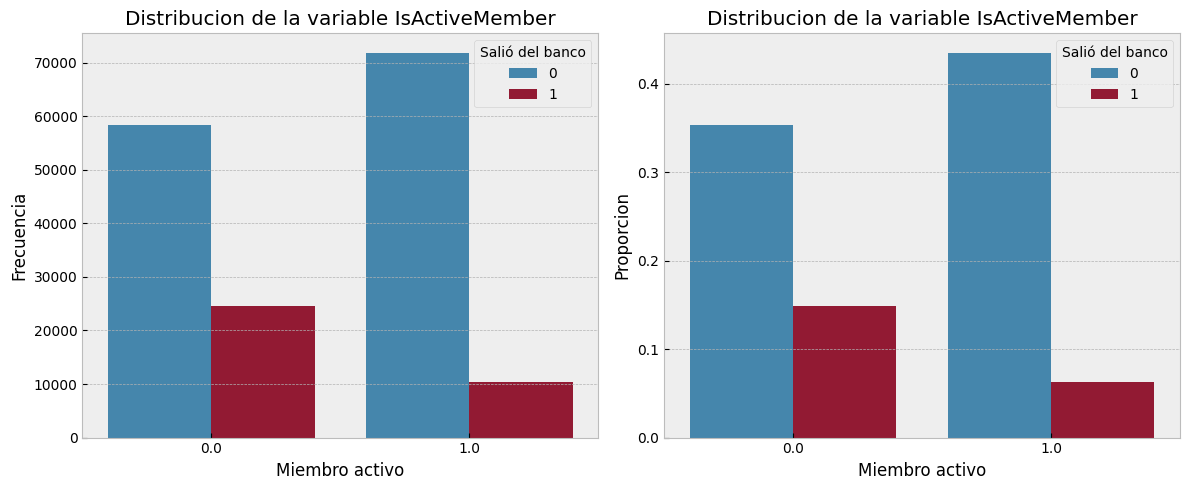

In [ ]:
#DISTRIBUCION DE LA VARIABLE ISACTIVEMEMBER
Distributions(df.IsActiveMember, df.Exited, 'IsActiveMember', 'Miembro activo').plot_distribution_cualit()

#### Analisis Bivariado

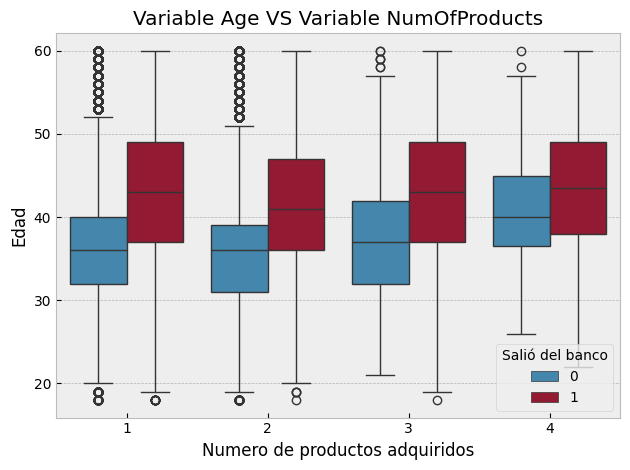

In [ ]:
#GRAFICO VARIABLE NUMOFPRODUCT VS AGE
mpl.style.use('bmh')
sns.boxplot(x=df.NumOfProducts, y=df.Age, hue=df.Exited)
plt.title('Variable Age VS Variable NumOfProducts')
plt.xlabel('Numero de productos adquiridos')
plt.ylabel('Edad')
plt.legend(title='Salió del banco')
plt.tight_layout()
plt.show()
mpl.style.use('default')

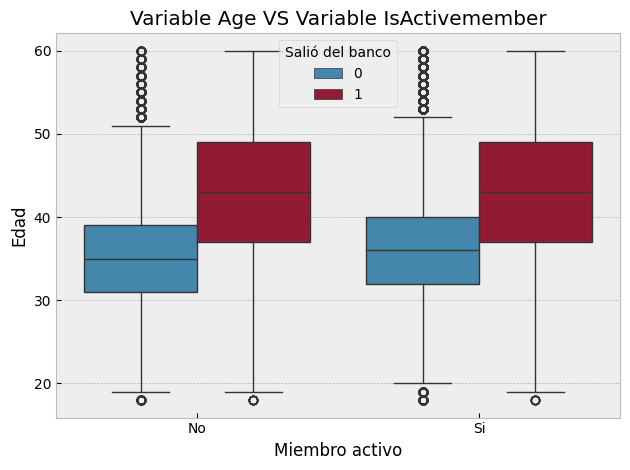

In [ ]:
#GRAFICO VARIABLE ISACTIVEMEMBER VS AGE
mpl.style.use('bmh')
sns.boxplot(x=df.IsActiveMember, y=df.Age, hue=df.Exited)
plt.title('Variable Age VS Variable IsActivemember')
plt.xlabel('Miembro activo')
plt.ylabel('Edad')
plt.legend(title='Salió del banco')
plt.xticks(ticks=[0.0,1.0], labels=['No','Si'])
plt.tight_layout()
plt.show()
mpl.style.use('default')

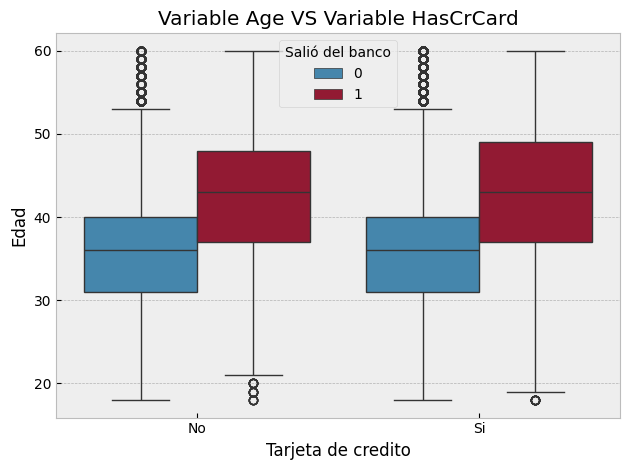

In [ ]:
#GRAFICO VARIABLE HASCRCARDVS AGE
mpl.style.use('bmh')
sns.boxplot(x=df.HasCrCard, y=df.Age, hue=df.Exited)
plt.title('Variable Age VS Variable HasCrCard')
plt.xlabel('Tarjeta de credito')
plt.ylabel('Edad')
plt.legend(title='Salió del banco')
plt.xticks(ticks=[0.0,1.0], labels=['No','Si'])
plt.tight_layout()
plt.show()
mpl.style.use('default')

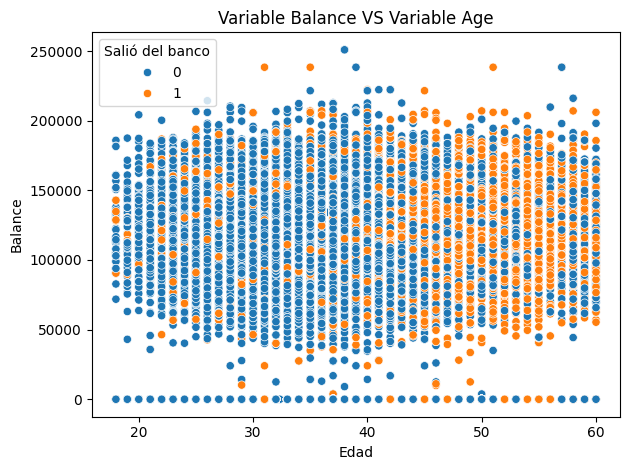

In [ ]:
#VARIABLE BALANCE VS EDAD
sns.scatterplot(x=df.Age, y=df.Balance, hue=df.Exited)
plt.title('Variable Balance VS Variable Age')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.legend(title='Salió del banco')
plt.tight_layout()
plt.show()

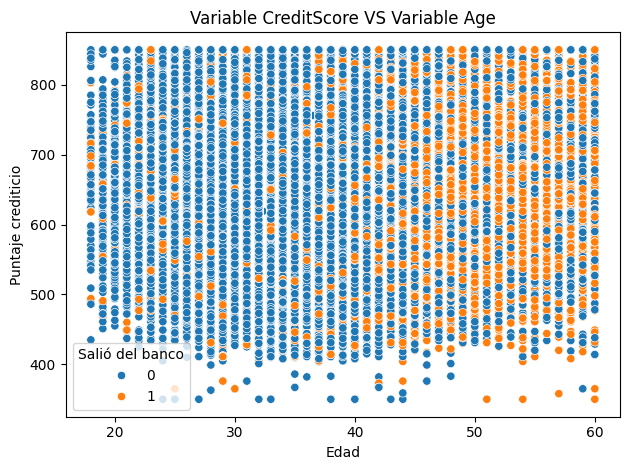

In [ ]:
#VARIABLE CREDITSCORE VS VARIABLE AGE
sns.scatterplot(x=df.Age, y=df.CreditScore, hue=df.Exited)
plt.title('Variable CreditScore VS Variable Age')
plt.xlabel('Edad')
plt.ylabel('Puntaje crediticio')
plt.legend(title='Salió del banco')
plt.tight_layout()
plt.show()

#### Analisis Multivariado

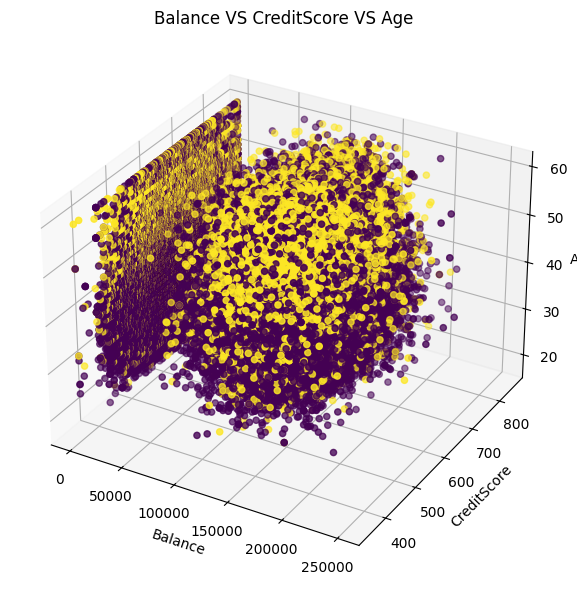

In [ ]:
#Balance VS CreditScore VS Age
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,6))
ax.scatter(df.Balance, df.CreditScore, df.Age, c=df.Exited)
ax.set(xlabel='Balance',
       ylabel='CreditScore',
       zlabel='Age')
plt.title('Balance VS CreditScore VS Age')
plt.tight_layout()
plt.show()

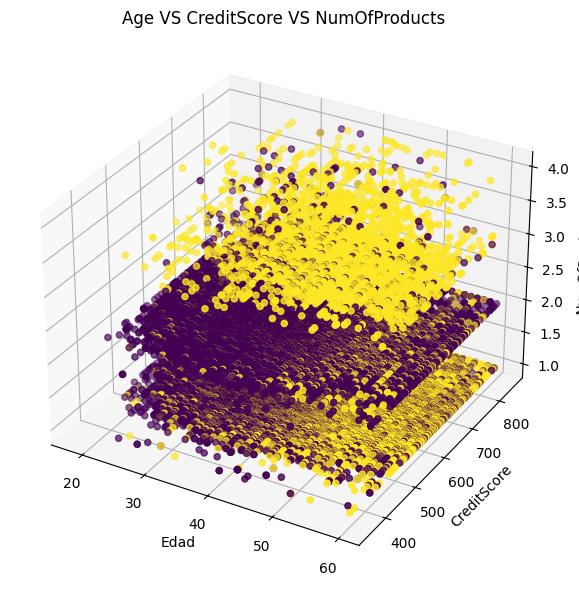

In [ ]:
#Age VS CreditScore VS NumOfProducts
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,6))
ax.scatter(df.Age, df.CreditScore, df.NumOfProducts,  c=df.Exited)
ax.set(xlabel='Edad',
       ylabel='CreditScore',
       zlabel='NumOfProducts')
plt.title('Age VS CreditScore VS NumOfProducts')
plt.tight_layout()
plt.show()